<a href="https://colab.research.google.com/github/pythonuzgit/Computer-vision-in-Medical-imaging/blob/main/Computer-vision-in-Medical-imaging%20/Medical_Imaging_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d heartzhacker/medical-imaging

Dataset URL: https://www.kaggle.com/datasets/heartzhacker/medical-imaging
License(s): apache-2.0
 99% 665M/673M [00:06<00:00, 124MB/s]
100% 673M/673M [00:06<00:00, 115MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
# import cv2
import itertools

import tensorflow as tf
import keras
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Use tensorflow.keras.preprocessing.image to import ImageDataGenerator

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
# from keras.optimizers import Adam
#from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import imageio
import matplotlib.image as img

import os
import pathlib

import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import imagenet_utils

In [ ]:
path = pathlib.Path(r"/content/Medical-imaging-dataset")

In [ ]:
iverticulosis = list(path.glob('Diverticulosis/*')) # Remove the leading absolute path
neoplasm = list(path.glob('Neoplasm/*')) # Remove the leading absolute path
peritonitis = list(path.glob('Peritonitis/*')) # Remove the leading absolute path
ureters = list(path.glob('Ureters/*')) # Remove the leading absolute path

In [ ]:
data = {

    'Diverticulosis' : iverticulosis,
    'Neoplasm' : neoplasm,
    'Peritonitis' : peritonitis,
    'Ureters' : ureters
}


polys_labels = {
    0:'Diverticulosis',
    1:'Neoplasm',
    2:'Peritonitis',
    3:'Ureters'
}


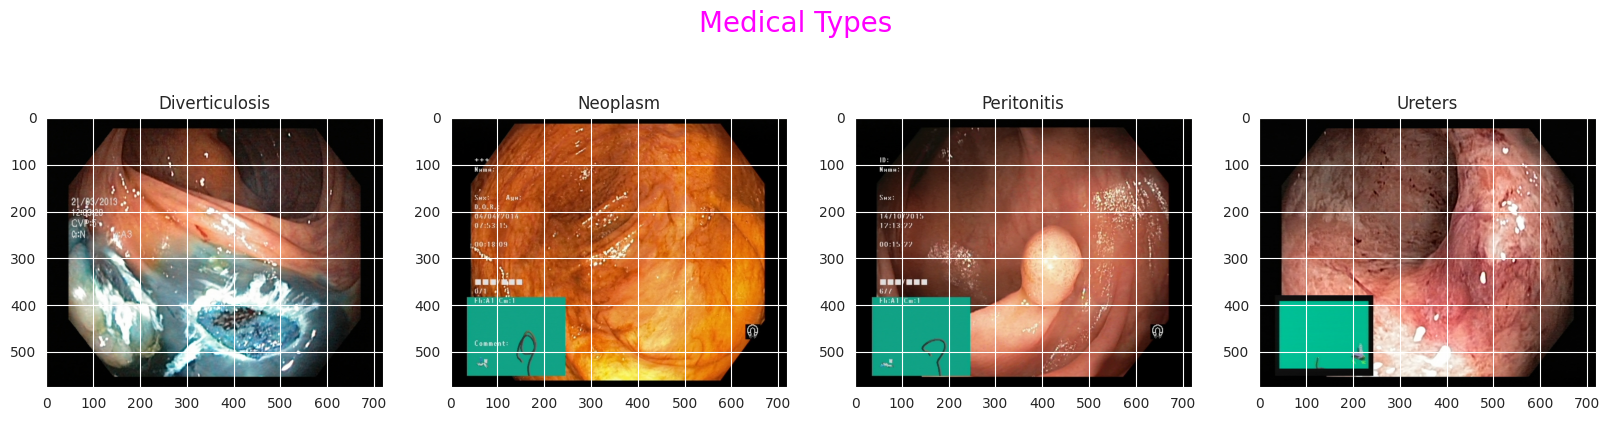

In [ ]:
fig , ax = plt.subplots(ncols=4 , figsize=(20,5))

fig.suptitle ('Medical Types', color='magenta', fontsize = 20)

iverticulosis_img = img.imread(iverticulosis[0])

neoplasm_img = img.imread(neoplasm[0])

peritonitis_img = img.imread(peritonitis[0])

ureters_img = img.imread(ureters[0]) # Read the image data from the first path in the ureters list

for index,name in enumerate(list(data.keys())):

    ax[index].set_title(name)

ax[0].imshow(iverticulosis_img)
ax[1].imshow(neoplasm_img)
ax[2].imshow(peritonitis_img)
ax[3].imshow(ureters_img) # Display the image data

In [ ]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=train_gen.flow_from_directory(r"/content/Medical-imaging-dataset",
                                         target_size=(224,224),batch_size=32,class_mode='categorical',
                                         shuffle=True,subset='training')
test_data =train_gen.flow_from_directory(r"/content/Medical-imaging-dataset",
                                         target_size=(224,224),batch_size=1,shuffle=False,subset='validation')

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(units=4,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
history=model.fit(train_data,epochs=50,validation_data=test_data,shuffle=True)

Epoch 1/50
100/100 [==============================] - 35s 331ms/step - loss: 0.7836 - accuracy: 0.6409 - val_loss: 0.5455 - val_accuracy: 0.7625
Epoch 2/50
100/100 [==============================] - 33s 327ms/step - loss: 0.5535 - accuracy: 0.7666 - val_loss: 0.5389 - val_accuracy: 0.7725
Epoch 3/50
100/100 [==============================] - 33s 330ms/step - loss: 0.4479 - accuracy: 0.8203 - val_loss: 0.5562 - val_accuracy: 0.7788
Epoch 4/50
100/100 [==============================] - 33s 328ms/step - loss: 0.3586 - accuracy: 0.8612 - val_loss: 0.6385 - val_accuracy: 0.7788
Epoch 5/50
100/100 [==============================] - 33s 326ms/step - loss: 0.1974 - accuracy: 0.9256 - val_loss: 0.7484 - val_accuracy: 0.7775
Epoch 6/50
100/100 [==============================] - 33s 327ms/step - loss: 0.1012 - accuracy: 0.9684 - val_loss: 0.9249 - val_accuracy: 0.7525
Epoch 7/50
100/100 [==============================] - 33s 325ms/step - loss: 0.1087 - accuracy: 0.9703 - val_loss: 0.8387 - val_ac

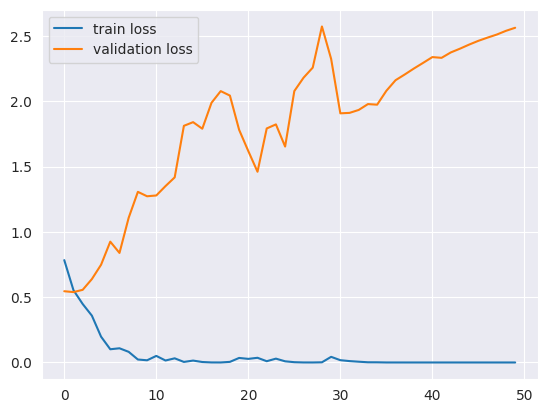

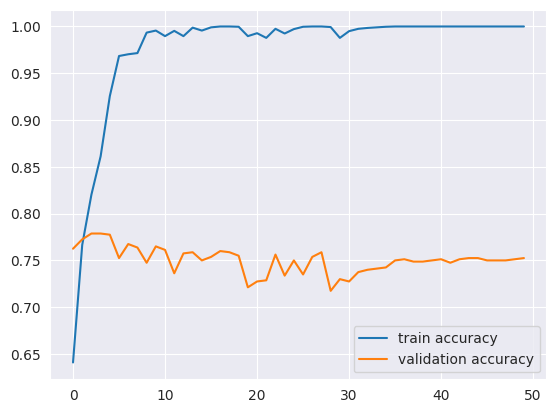

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()